In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# マルコフ過程に基づくシーズン得点数の推定

マルコフ過程とは未来の状態が現在の状態のみから確率的に決まるような確率過程のことを言います。式では次のようになります．

\begin{equation}
    S_{t+1} = P(t)S_{t}\tag{1}
\end{equation}

ここで$S_t$は時刻$t$において状態$j$にある確率を$j$番目の要素として持つベクトルで$j=1, 2, ..., n$です．そのため，

\begin{equation}
    \sum_{j=1}^nS_t(j) = 1\tag{2}
\end{equation}

を時刻によらず満たします．

次に，$P(t)$は$n\times n$の推移確率行列です．$P(t)$の$ij$成分$P_{ij}(t)$は次のように定義されています．

\begin{equation}
    P_{ij}(t) = P(X_{t+1}=j|X_{t}=i, t)\tag{3}
\end{equation}
式の右辺は時刻$t$における状態$i$が，時刻$t+1$で状態$j$にある確率を表しています．つまり式(1)は時刻$t$での各状態の実現確率から時刻$t+1$における各状態の実現確率を計算しています．

## 野球で実現される状態の定義
ここでは野球の状態を定義していく．[2]を基にしている．



In [2]:
df = pd.DataFrame(np.arange(0, 24).reshape(3, -1), index=["OUT:0", "OUT:1", "OUT:2"], columns=["無塁", "一塁", "二塁", "三塁", "一二塁", "一三塁", "二三塁", "満塁"])
df.loc["OUT:3"] = np.ones(8, dtype="int")*24
print("表1 : 野球の攻撃状況")
df.head(4)

表1 : 野球の攻撃状況


,無塁,一塁,二塁,三塁,一二塁,一三塁,二三塁,満塁
OUT:0,0,1,2,3,4,5,6,7
OUT:1,8,9,10,11,12,13,14,15
OUT:2,16,17,18,19,20,21,22,23
OUT:3,24,24,24,24,24,24,24,24


野球には上の表で示された$0\sim24$までの合計$25$個の状態が定義できる．例えば，各回の攻撃は状態$0$から始まり，四球などで一塁に進む場合は状態$1$に移る．また，回の攻撃の終わりは状態$24$になることである．この定義によって野球の攻撃の状態の実現確率を式(1)を用いて計算していくことが出来る．そのためには各選手の推移確率行列を推定する必要がある．

## 野球における推移確率行列
合計$25$個の状態を推移していく行列なので，推移確率行列$P(t)$は$25\times25$の行列となる．

### 確率の算出
次に各打席の結果とそれに応じて変化する塁の状況について述べる．
* 四死球($p_{w}$)
>四死球では打者が一塁，そのとき一塁にランナーがいるならば二塁へ，さらに二塁にランナーがいる場合三塁へ，さらに三塁にランナーがいる場合得点となる．確率の計算式は式(\ref{eq:pw})で表される．
\begin{equation}
\label{eq:pw}
p_{w}(t) = \frac{四球+死球}{打席数-エラー出塁}\tag{4}
\end{equation}
ここで$i$は打順の番号であり$1\leq i\leq9$である．

* 単打($p_{s}$)
>単打では打者が一塁，一塁のランナーは二塁へ，二塁及び三塁のランナーは得点となる．確率の計算式は式(\ref{eq:ps})で表される．
\begin{equation}
\label{eq:ps}
p_{s}(t) = \frac{単打数}{打席数-エラー出塁}\tag{5}
\end{equation}
ここで$i$は打順の番号であり$1\leq i\leq9$である．

* 二塁打($p_{d}$)
> 二塁打では打者が二塁，一塁及び二塁及び三塁のランナーは得点となる．確率の計算式は式(\ref{eq:pd})で表される．
\begin{equation}
\label{eq:pd}
p_{d}(t) = \frac{二塁打数}{打席数-エラー出塁}\tag{6}
\end{equation}
ここで$i$は打順の番号であり$1\leq i\leq9$である．

* 三塁打($p_{t}$)
> 三塁打では打者が三塁，一塁及び二塁及び三塁のランナーは得点となる．確率の計算式は式(\ref{eq:pt})で表される．
\begin{equation}
\label{eq:pt}
p_{t}(t) = \frac{三塁打数}{打席数-エラー出塁}\tag{7}
\end{equation}
ここで$i$は打順の番号であり$1\leq i\leq9$である．

* 本塁打($p_{h}$)
> 本塁打では打者及び一塁及び二塁及び三塁のランナーは得点となる．確率の計算式は式(\ref{eq:ph})で表される．
\begin{equation}
\label{eq:ph}
p_{h}(t) = \frac{本塁打数}{打席数-エラー出塁}\tag{8}
\end{equation}
ここで$i$は打順の番号であり$1\leq i\leq9$である．


* 犠打($p_{sh}$)
> 儀打ではアウトカウントが一つ増える．ここでは一塁のランナーが二塁へ進むのみとした．確率の計算式は式(\ref{eq:psh})で表される．
\begin{equation}
\label{eq:psh}
p_{sh}(t) = \frac{儀打数}{打席数-エラー出塁}\tag{9}
\end{equation}
ここで$i$は打順の番号であり$1\leq i\leq9$である．

* 犠飛($p_{sf}$)
> 儀飛ではアウトカウントが一つ増える．二塁のランナーは三塁へ，三塁のランナーは得点となる．確率の計算式は式(\ref{eq:psf})で表される．
\begin{equation}
\label{eq:psf}
p_{sf}(t) = \frac{儀飛数}{打席数-エラー出塁}\tag{10}
\end{equation}
ここで$i$は打順の番号であり$1\leq i\leq9$である．

* アウト($p_{o}$)
> アウトカウントが一つ増える．確率の計算式は式(\ref{eq:po})で表される．
\begin{equation}
\label{eq:po}
p_{o}(t) = 1 - p_{w}(t) - p_{s}(t) - p_{d}(t) - p_{t}(t) - p_{h}(t) - p_{sh}(t) - p_{sf}(t)\tag{11}
\end{equation}
ここで$i$は打順の番号であり$1\leq i\leq9$である．


## 状態遷移行列
先に表してきた確率から$i$番打者の状態遷移行列$P(t)$は次の式(\ref{eq:P})で表される．
\begin{equation}
\label{eq:P}
P(t) = 
\begin{bmatrix}
A(t) & B(t) & 0 & 0\\
0 & A(t) & B(t) & 0\\
0 & 0 & A(t) & F(t)\\
0 & 0 & 0 & 1
\end{bmatrix}\tag{12}
\end{equation}

\begin{equation}
\label{eq:A}
A(t) = 
\begin{bmatrix}
p_{h}(t) & p_{s}(t)+p_{w}(t) & p_{d}(t) & p_{t}(t) & 0     & 0     & 0     & 0 \\
p_{h}(t) & 0     & 0     & p_{t}(t) & p_{s}(t)+p_{w}(t) & 0     & p_{d}(t) & 0 \\
p_{h}(t) & p_{s}(t) & p_{d}(t) & p_{t}(t) & p_{w}(t) & 0     & 0     & 0 \\
p_{h}(t) & p_{s}(t) & p_{d}(t) & p_{t}(t) & 0     & p_{w}(t) & 0     & 0 \\
p_{h}(t) & 0     & 0     & p_{t}(t) & p_{s}(t) & 0     & p_{d}(t) & p_{w}(t) \\
p_{h}(t) & 0     & 0     & p_{t}(t) & p_{s}(t) & 0     & p_{d}(t) & p_{w}(t) \\
p_{h}(t) & p_{s}(t) & p_{d}(t) & p_{t}(t) & 0 & 0     & 0     & p_{w}(t) \\
p_{h}(t) & 0     & 0     & p_{t}(t) & p_{s}(t) & 0     & p_{d}(t) & p_{w}(t) \\
\end{bmatrix}\tag{13}
\end{equation}

\begin{equation}
\label{eq:B}
B(t) = 
\begin{bmatrix}
p_{o}(t)+p_{sh}(t)+p_{sf}(t) & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
0     & p_{o}(t)+p_{sf}(t) & p_{sh}(t) & 0     & 0     & 0     & 0     & 0 \\
0     & 0     & p_{o}(t)+p_{sh}(t) & p_{sf}(t) & 0     & 0     & 0     & 0 \\
p_{sf}(t) & 0     & 0     & p_{o}(t)+p_{sh}(t) & 0     & 0     & 0     & 0 \\
0     & 0     & 0     & 0     & p_{o}(t)+p_{sh}(t) & p_{sf}(t) & 0     & 0 \\
0     & p_{sf}(t) & 0     & 0     & 0     & p_{o}(t)+p_{sh}(t) & 0     & 0 \\
0     & 0     & 0     & p_{sf}(t) & 0     & 0     & p_{o}(t)+p_{sh}(t) & 0 \\
0     & 0     & 0     & 0     & 0     & p_{sf}(t) & 0     & p_{o}(t)+p_{sh}(t) \\
\end{bmatrix}\tag{14}
\end{equation}

\begin{equation}
\label{eq:F}
F(t) = 
\begin{bmatrix}
p_{o}(t)+p_{sh}(t)+p_{sf}(t) \\
p_{o}(t)+p_{sh}(t)+p_{sf}(t) \\
p_{o}(t)+p_{sh}(t)+p_{sf}(t) \\
p_{o}(t)+p_{sh}(t)+p_{sf}(t) \\
p_{o}(t)+p_{sh}(t)+p_{sf}(t) \\
p_{o}(t)+p_{sh}(t)+p_{sf}(t) \\
p_{o}(t)+p_{sh}(t)+p_{sf}(t) \\
p_{o}(t)+p_{sh}(t)+p_{sf}(t) \\
\end{bmatrix}\tag{15}
\end{equation}

ここで状態遷移行列$P$は$25\times25$の行列であり，各行番号は$i$番打者が打撃前の攻撃状況を表し，各列番号は$i$番打者の打撃後の攻撃状況を表している．攻撃状況と各番号は表\ref{table:joukyou}と対応している．例えば$i=1$がOUT:$0$，無塁から攻撃を行う場合は$P(1)$の一行目をみる．その打撃の結果OUT:$0$，一塁になるような確率は式(\ref{eq:P})及び式(\ref{eq:A})から，$p_{w}(1)+p_{s}(1)$である．





In [3]:
def make_prob_matrix(table):
    """
    ---------
    input
    ---------
    table・・・9人分の選手の成績が入ったPandas.DataFrameのデータ
    
    ---------
    output
    ---------
    P・・・選手数 9 * 現在の状態 25 * 次の時刻での状態 25
    """

    PA = table["PA"].values - table["EOB"].values
    dou = table["DOU"].values
    tri = table["TRI"].values
    hom = table["HR"].values
    wal = table["BB"].values + table["HBP"].values
    sin = table["H"].values - dou - tri - hom
    sh = table["SH"].values
    sf = table["SF"].values


    pw = wal / PA # 式(4)
    ps = sin / PA # 式(5)
    pd = dou / PA # 式(6)
    pt = tri / PA # 式(7)
    ph = hom / PA # 式(8)
    psh = sh / PA # 式(9)
    psf = sf / PA # 式(10)

    po = 1 - pw - ps - pd - pt - ph - psh - psf # 式(11)


    P = np.zeros([9, 25, 25])

    for i in range(9):

        # 式(13)
        A = np.array([[ph[i], ps[i]+pw[i], pd[i], pt[i], 0, 0, 0, 0],
                      [ph[i], 0, 0, pt[i], ps[i]+pw[i], 0, pd[i], 0],
                      [ph[i], ps[i], pd[i], pt[i], pw[i], 0, 0, 0],
                      [ph[i], ps[i], pd[i], pt[i], 0, pw[i], 0, 0],
                      [ph[i], 0, 0, pt[i], ps[i], 0, pd[i], pw[i]],
                      [ph[i], 0, 0, pt[i], ps[i], 0, pd[i], pw[i]],
                      [ph[i], ps[i], pd[i], pt[i], 0, 0, 0, pw[i]],
                      [ph[i], 0, 0, pt[i], ps[i], 0, pd[i], pw[i]]])

        # 式(14)
        B = np.identity(8) * (po[i] + psh[i])
        # 式(15)
        F = np.ones([8]) * (po[i] + psh[i] + psf[i])

        P[i, :8, :8] = A
        P[i, :8, 8:16] = B
        P[i, 8:16, 8:16] = A
        P[i, 8:16, 16:24] = B
        P[i, 16:24, 16:24] = A
        P[i, 16:24, 24] = F
        P[i, 24, 24] = 1

        P[i, 1, 10] = psh[i]
        P[i, 2, 11] = psf[i]
        P[i, 3, 8] = psf[i]
        P[i, 4, 13] = psf[i]
        P[i, 5, 9] = psf[i]
        P[i, 6, 11] = psf[i]
        P[i, 7, 13] = psf[i]
        P[i, 9, 18] = psh[i]
        P[i, 10, 19] = psf[i]
        P[i, 11, 16] = psf[i]
        P[i, 12, 21] = psf[i]
        P[i, 13, 17] = psf[i]
        P[i, 14, 19] = psf[i]
        P[i, 15, 21] = psf[i]

        P[i, 0, 8] += psf[i]
        P[i, 8, 16] += psf[i]
        P[i, 1, 9] += psf[i] - psh[i]
        P[i, 9, 17] += psf[i] - psh[i]

    return P

## $1$イニングの得点確率分布の算出
ここからは前節の確率遷移行列を基に$1$イニングでの得点確率分布の計算について述べる．始めに得点確率行列$P_{k}(t)$を定義する．これは$i$番打者の打席の結果，$k$点得点が増える確率を表す行列であり，状態遷移行列$P(t)$との関係は次の式(\ref{eq:P=Pk})で表される．
\begin{equation}
\label{eq:P=Pk}
P(t) = \sum_{k=0}^{4} P_{k}(t)\tag{16}
\end{equation}

$i$番打者によって得点が増えない確率は次の式(\ref{eq:P0i})で表される．
\begin{equation}
\label{eq:P0i}
P_{0}(t) =
\begin{bmatrix}
A_{0}(t) & B_{0}(t) & 0 & 0\\
0 & A_{0}(t) & B_{0}(t) & 0\\
0 & 0 & A_{0}(t) & 0\\
0 & 0 & 0 & 0
\end{bmatrix}\tag{17}
\end{equation}

\begin{equation}
\label{eq:A0i}
A_{0}(t) = 
\begin{bmatrix}
0     & p_{s}(t)+p_{w}(t) & p_{d}(t) & p_{t}(t) & 0     & 0     & 0     & 0 \\
0     & 0     & 0     & 0     & p_{s}(t)+p_{w}(t) & 0     & p_{d}(t) & 0 \\
0     & 0     & 0     & 0     & p_{w}(t) & 0     & 0     & 0 \\
0     & 0     & 0     & 0     & 0     & p_{w}(t) & 0     & 0 \\
0     & 0     & 0     & 0     & 0     & 0     & 0     & p_{w}(t) \\
0     & 0     & 0     & 0     & 0     & 0     & 0     & p_{w}(t) \\
0     & 0     & 0     & 0     & p_{t}(t) & 0     & 0     & p_{w}(t) \\
0     & 0     & 0     & 0     & p_{s}(t) & 0     & 0     & 0 \\
\end{bmatrix}\tag{18}
\end{equation}

\begin{equation}
\label{eq:B0i}
B_{0}(t) = 
\begin{bmatrix}
p_{o}(t)+p_{sh}(t)+p_{sf}(t) & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
0     & p_{o}(t)+p_{sf}(t) & p_{sh}(t) & 0     & 0     & 0     & 0     & 0 \\
0     & 0     & p_{o}(t)+p_{sh}(t) & p_{sf}(t) & 0     & 0     & 0     & 0 \\
0     & 0     & 0     & p_{o}(t)+p_{sh}(t) & 0     & 0     & 0     & 0 \\
0     & 0     & 0     & 0     & p_{o}(t)+p_{sh}(t) & p_{sf}(t) & 0     & 0 \\
0     & 0     & 0     & 0     & 0     & p_{o}(t)+p_{sh}(t) & 0     & 0 \\
0     & 0     & 0     & 0     & 0     & 0     & p_{o}(t)+p_{sh}(t) & 0 \\
0     & 0     & 0     & 0     & 0     & 0     & 0     & p_{o}(t)+p_{sh}(t) \\
\end{bmatrix}\tag{19}
\end{equation}
$i$番打者によって得点が$1$増える確率は次の式(\ref{eq:P1i})で表される．
\begin{equation}
\label{eq:P1i}
P_{1}(t) =
\begin{bmatrix}
A_{1}(t) & B_{1}(t) & 0 & 0\\
0 & A_{1}(t) & B_{1}(t) & 0\\
0 & 0 & A_{1}(t) & 0\\
0 & 0 & 0 & 0
\end{bmatrix}\tag{20}
\end{equation}

\begin{equation}
\label{eq:A1i}
A_{1}(t) = 
\begin{bmatrix}
p_{h}(t) & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
0     & 0     & 0     & p_{t}(t) & 0     & 0     & 0     & 0 \\
0     & p_{s}(t) & p_{d}(t) & p_{t}(t) & 0     & 0     & 0     & 0 \\
0     & p_{s}(t) & p_{d}(t) & p_{t}(t) & 0     & 0     & 0     & 0 \\
0     & 0     & 0     & 0     & p_{s}(t) & 0     & p_{d}(t) & 0 \\
0     & 0     & 0     & 0     & p_{s}(t) & 0     & p_{d}(t) & 0 \\
0     & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
0     & 0     & 0     & 0     & 0     & 0     & 0     & p_{w}(t) \\
\end{bmatrix}\tag{21}
\end{equation}

\begin{equation}
\label{eq:B1i}
B_{1}(t) = 
\begin{bmatrix}
0     & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
0     & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
0     & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
p_{sf}(t) & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
0     & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
0     & p_{sf}(t) & 0     & 0     & 0     & 0     & 0     & 0 \\
0     & 0     & 0     & p_{sf}(t) & 0     & 0     & 0     & 0 \\
0     & 0     & 0     & 0     & 0     & p_{sf}(t) & 0     & 0 \\
\end{bmatrix}\tag{22}
\end{equation}
$i$番打者によって得点が$2$増える確率は次の式(\ref{eq:P2i})で表される．

\begin{equation}
\label{eq:P2i}
P_{2}(t) =
\begin{bmatrix}
A_{2}(t) & 0 & 0 & 0\\
0 & A_{2}(t) & 0 & 0\\
0 & 0 & A_{2}(t) & 0\\
0 & 0 & 0 & 0
\end{bmatrix}\tag{23}
\end{equation}

\begin{equation}
\label{eq:A2i}
A_{2}(t) = 
\begin{bmatrix}
0     & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
p_{h}(t) & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
p_{h}(t) & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
p_{h}(t) & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
0     & 0     & 0     & p_{t}(t) & 0     & 0     & 0     & 0 \\
0     & 0     & 0     & p_{t}(t) & 0     & 0     & 0     & 0 \\
0     & p_{s}(t) & p_{d}(t) & p_{t}(t) & 0     & 0     & 0     & 0 \\
0     & 0     & 0     & 0     & p_{s}(t) & 0     & p_{d}(t) & 0 \\
\end{bmatrix}\tag{24}
\end{equation}

$i$番打者によって得点が$3$増える確率は次の式(\ref{eq:P3i})で表される．

\begin{equation}
\label{eq:P3i}
P_{3}(t) =
\begin{bmatrix}
A_{3}(t) & 0 & 0 & 0\\
0 & A_{3}(t) & 0 & 0\\
0 & 0 & A_{3}(t) & 0\\
0 & 0 & 0 & 0
\end{bmatrix}\tag{25}
\end{equation}

\begin{equation}
\label{eq:A3i}
A_{3}(t) = 
\begin{bmatrix}
0     & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
0     & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
0     & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
0     & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
p_{h}(t) & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
p_{h}(t) & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
p_{h}(t) & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
0     & 0     & 0     & p_{t}(t) & 0     & 0     & 0     & 0 \\
\end{bmatrix}\tag{26}
\end{equation}

$i$番打者によって得点が$4$増える確率は次の式(\ref{eq:P4i})で表される．

\begin{equation}
\label{eq:P4i}
P_{4}(t) =
\begin{bmatrix}
A_{4}(t) & 0 & 0 & 0\\
0 & A_{4}(t) & 0 & 0\\
0 & 0 & A_{4}(t) & 0\\
0 & 0 & 0 & 0
\end{bmatrix}\tag{27}
\end{equation}

\begin{equation}
\label{eq:A4i}
A_{3}(t) = 
\begin{bmatrix}
0     & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
0     & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
0     & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
0     & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
0 & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
0 & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
0 & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
p_{h}(t)     & 0     & 0     & 0 & 0     & 0     & 0     & 0 \\
\end{bmatrix}\tag{28}
\end{equation}


次に$1$イニングで得た得点とその確率を示す行列$U$を考える．$1$イニングで得られる得点の最大値を$R_{max}$として$U$は$R_{max}$行$25$列の行列である．各行番号は得点を表しており，各列番号は$25$個の攻撃状況を表しており，初期状態(攻撃の始まり)として$U^{0}_{0}=1$である．この$R_{max}$はパラメータであり，考慮する状況を調節することが出来る．この$U$は次の式(\ref{eq:U_update})を用いて更新されていく．
\begin{equation}
\label{eq:U_update}
U^{n+1}_{r} = \sum_{k=0}^{4}U^{n}_{r-k}P_{k}(t)\tag{29}
\end{equation}
式(\ref{eq:U_update})の更新ごとに$U$の$25$列目(OUT:3)の合計を計算し，$0.999999$を上回っていれば計算を終了する．$1$イニングで$r$点得られる確率$Inn_{r}$は，
\begin{equation}
\label{eq:PRINN}
Inn_{r} = u_{r,25}~~~~(0 \leq r \leq R_{max})\tag{30}
\end{equation}
で計算できる．


In [4]:
def Run_matrix(Prob, R_max, start_number, end_prob):
    mask_A = np.array([[1, 0, 0, 0, 0, 0, 0, 0],
                       [2, 1, 1, 1, 0, 0, 0, 0],
                       [2, 1, 1, 1, 0, 0, 0, 0],
                       [2, 1, 1, 1, 0, 0, 0, 0],
                       [3, 2, 2, 2, 1, 1, 1, 0],
                       [3, 2, 2, 2, 1, 1, 1, 0],
                       [3, 2, 2, 2, 1, 1, 1, 0],
                       [4, 3, 3, 3, 2, 2, 2, 1]])


    mask_matrix = np.zeros([25, 25])
    mask_matrix[:8, :8] = mask_A
    mask_matrix[8:16, 8:16] = mask_A
    mask_matrix[16:24, 16:24] = mask_A



    #犠飛を考える
    mask_matrix[3, 8] = 1
    mask_matrix[5, 9] = 1
    mask_matrix[6, 11] = 1
    mask_matrix[7, 13] = 1
    mask_matrix[11, 16] = 1
    mask_matrix[13, 17] = 1
    mask_matrix[14, 19] = 1
    mask_matrix[15, 21] = 1


    P = np.zeros([5, 9, 25, 25])
    for i in range(5):
        P[i] = Prob * [mask_matrix==i]
    U = np.zeros([R_max, 25])
    U[0, 0] = 1
    k = start_number
    E = np.zeros([9, R_max])
    #i = 0
    t = 0
    while np.sum(U[:, 24]) <= end_prob:
        #print(i)
        #i += 1
        #式(2)
        U_pre = np.copy(U)
        U = np.dot(U_pre , P[0, k])
        for r in range(1,5):
            U[r:] += np.dot(U_pre[:-r], P[r, k])

        b = U[:, 24] - U_pre[:, 24]

        #次の打者に動く
        k += 1
        k = k % 9

        for r in range(R_max):
            E[k,r] += b[r]

        #print(np.sum(U[:, 24]))
        """
        if np.sum(b) <= 0.0 and i > 2:
            t += 1
            U = np.zeros([R_max + t, 25])
            U[0,0] = 1
            k = start_number
            E = np.zeros([9,R_max + t])
            i = 0
        """


    return E, t


## $1$試合の得点確率分布の算出
前節から$1$イニングの得点確率分布の算出は可能になった．ここから$1$試合($9$イニング）での確率分布を算出するために，あるイニングの先頭打者が$i$で次のイニングの攻撃が$j$番打者から始まり，$r$点とる確率を$e_{i,j,r}$とする．この時，$m$回の攻撃が$n$番から始まり，その時の確率分布を$a_{m,n,r}$とすると，
\begin{equation}
\label{eq:amn}
    a_{1,n,r} = 
  \begin{cases}
    	1 ~~~(n=1, r = 0) \\
    	0 ~~~otherwise \\
  \end{cases}\tag{31}
\end{equation}
\begin{equation}
a_{m,n,r}=	\sum_{k=1}^{9}\sum_{l=0}^{r} a_{m-1,k,r-l}e_{k,n,r} ~~~(m=2,3,…,10, ~~n = 1,2,…,9,~~r=0,1,…,R_{max})\tag{32}
\end{equation}
となる．これにより$1$試合で$r$点得られる確率$G_{r}$は，
\begin{equation}
\label{eq:PRPG}
G_{r} = \sum_{k=1}^{9} a_{10,k,r}\tag{33}
\end{equation}
であり，$1$試合の得点期待値$ER$は，
\begin{equation}
\label{eq:ERPG}
ER=\sum_{r=0}^{R_{max}} r\times G_{r}\tag{34}
\end{equation}
となる．



In [5]:
def cal_ERBG(Prob, R_max, end_prob):
    E = []
    t = 0
    for i in range(9):
#        print (i)
        a, t = Run_matrix(Prob, R_max + t, i, end_prob)
        E.append(a)

    val = E[-1].shape[1]
    for i in range(9):
        k = val - E[i].shape[1]
        E[i] = np.c_[E[i], np.zeros([k, 9]).T]

    E = np.array(E)

    A = np.zeros([10, 9, val])
    A[0, 0, 0] = 1
    for m in range(1, 10):
        for r in range(val):
            for l in range(r+1):
                A[m, :, r] += np.dot(A[m-1, :,r-l], E[:, :, l])
    """
    シグマ計算記述用
    for m in range(1,10):
        for n in range(9):
            for r in range(val):
                for l in range(r+1):
                    A[m,n,r] += np.dot(A[m-1,:,r-l],E[:,:,l])
    """
    Run_prob = np.sum(A[9], axis=0)
    ERBG = np.sum(Run_prob * np.arange(val))

    """
    できばえ確認用
    plt.plot(Run_prob)
    print(ERBG)
    """

    return ERBG, Run_prob


In [6]:
# 確率を計算するチームを決定
team_list = ["G", "T", "D", "Ys", "C", "De", "L", "F", "E", "H", "M", "O"]
season_list = [2018]
color_key = {"G":"orange",
             "T":"yellow",
             "D":"blue",
             "Ys":"green",
             "C":"red",
             "De":"cyan",
             "L":"navy",
             "F":"black",
             "E":"darkred",
             "H":"gold",
             "M":"grey",
             "O":"darkslateblue"}

folder = "data_csv/batting_number_data/"

# 打順別成績のロード
tables = []
data_index = []
for team in team_list:
    for season in season_list:
        print("Start : {}_{}".format(team, season))
        table = pd.read_csv(folder+team+"_"+str(season)+"_batting.csv", index_col="INDEX")
        tables.append(table)
        data_index.append("{}_{}".format(team, season))
        print("End : {}_{}".format(team, season))
table.head(10)

Start : G_2018
End : G_2018
Start : T_2018
End : T_2018
Start : D_2018
End : D_2018
Start : Ys_2018
End : Ys_2018
Start : C_2018
End : C_2018
Start : De_2018
End : De_2018
Start : L_2018
End : L_2018
Start : F_2018
End : F_2018
Start : E_2018
End : E_2018
Start : H_2018
End : H_2018
Start : M_2018
End : M_2018
Start : O_2018
End : O_2018


,AVE,RBI,HR,H,SIN,DOU,TRI,OBP,SLG,OPS,...,P_SH,SH,SR_SH,SF,PH,H_PH,AVE_PH,DP,EOB,K
INDEX,,,,,,,,,,,,,,,,,,,,,
NO1,0.228,40.0,11.0,123.0,79.0,30.0,3.0,0.303,0.356,0.659,...,16.0,14.0,.875,3.0,0.0,0.0,.---,7.0,5.0,112.0
NO2,0.222,26.0,3.0,115.0,93.0,16.0,3.0,0.289,0.282,0.571,...,29.0,26.0,.897,1.0,0.0,0.0,.---,7.0,6.0,90.0
NO3,0.270,82.0,26.0,144.0,89.0,27.0,2.0,0.339,0.474,0.813,...,2.0,2.0,1.000,8.0,0.0,0.0,.---,9.0,2.0,127.0
NO4,0.277,71.0,26.0,145.0,86.0,32.0,1.0,0.362,0.491,0.853,...,0.0,0.0,.---,5.0,0.0,0.0,.---,13.0,2.0,85.0
NO5,0.270,60.0,12.0,138.0,99.0,25.0,2.0,0.338,0.396,0.735,...,5.0,5.0,1.000,2.0,0.0,0.0,.---,11.0,5.0,88.0
NO6,0.216,49.0,12.0,104.0,76.0,15.0,1.0,0.277,0.326,0.603,...,12.0,9.0,.750,3.0,0.0,0.0,.---,10.0,8.0,115.0
NO7,0.219,64.0,10.0,105.0,75.0,17.0,3.0,0.271,0.329,0.600,...,7.0,3.0,.429,7.0,0.0,0.0,.---,17.0,7.0,109.0
NO8,0.240,44.0,3.0,109.0,84.0,17.0,5.0,0.295,0.319,0.613,...,23.0,18.0,.783,1.0,0.0,0.0,.---,8.0,9.0,89.0
NO9,0.218,28.0,1.0,78.0,65.0,10.0,2.0,0.247,0.265,0.512,...,37.0,28.0,.757,1.0,0.0,0.0,.---,9.0,5.0,106.0


In [7]:
# 式(30)のR_max
R_max = 25

# 計算を終える状態24の確率
end_prob = 1 - 1e-6

ERBGs = []
Run_probs = []
for table in tables:
    # 式(3)のP
    P = make_prob_matrix(table)


    # 得点期待値と得点の確率分布
    ERBG, Run_prob = cal_ERBG(P, R_max, end_prob)
    
    ERBGs.append(ERBG)
    Run_probs.append(Run_prob)
    
Run_probs = np.array(Run_probs)
ERBGs = np.array(ERBGs)

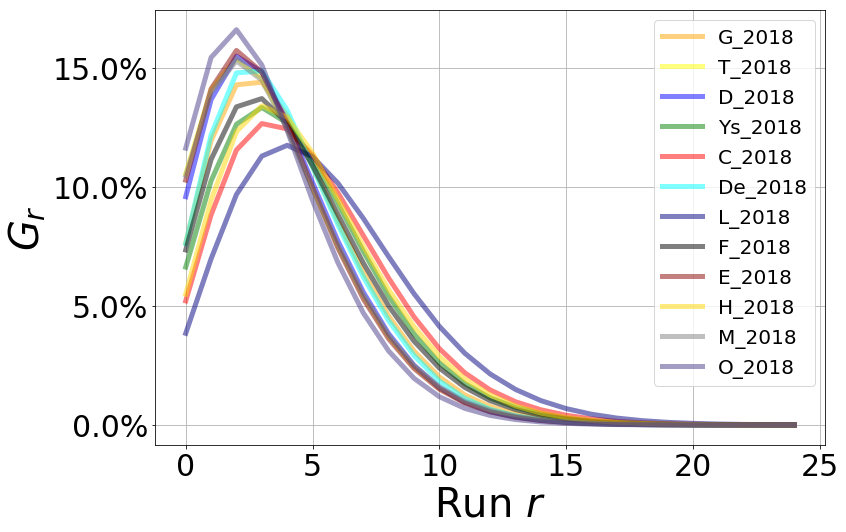

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for data, Run_prob in zip(data_index, Run_probs):
    ax.plot(np.arange(0, R_max), Run_prob, label = data, color=color_key[data.split("_")[0]], linewidth=5, alpha=0.5)
ax.legend(fontsize=20)
ax.tick_params(labelsize=30)
ax.grid()
ax.set_xlabel("Run $r$", fontsize=40)
ax.set_ylabel("$G_r$", fontsize=40)
ax.set_yticklabels(['{:.{}f}%'.format(x*100, 1) for x in ax.get_yticks()])
plt.show()

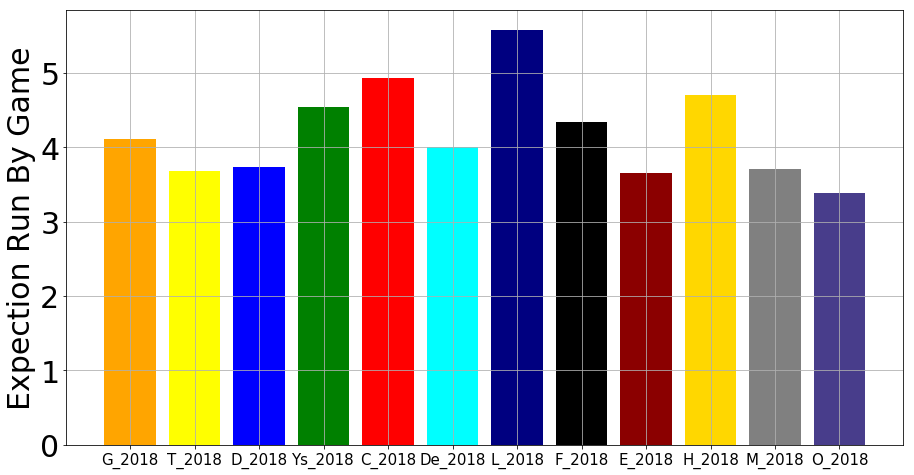

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
for i, ERBG in enumerate(ERBGs):
    ax.bar(i, ERBG, color=color_key[data_index[i].split("_")[0]])
ax.set_xticks(np.arange(12))
ax.set_xticklabels(data_index)
ax.grid()
ax.set_ylabel("Expection Run By Game", fontsize=30)
ax.tick_params(axis="y", labelsize=30)
ax.tick_params(axis="x", labelsize=15)
plt.show()

### 走塁の影響を考慮する

BBANALY プロ野球データ分析さん(https://hihrois-1104o.hatenablog.com/entry/yakyuu-simyu-3) [5] を参考に走塁の影響をD'Espo & Lefkowitzモデルに組み込んでみる．走塁の影響を考えるべき状況は以下の通りである．2018年のNPBの結果を併記する．

In [10]:
runner_condition_table = pd.read_csv("NPB_runner_condition_and_results_data_2018.csv")

> 1塁ランナーがシングルヒットで2 or 3塁に進む
* 1 → 4 or 5,
* 9 → 12 or 13, 
* 17 → 20 or 21,
* 5 → 4 or 5,
* 13 → 12 or 13, 
* 21 → 20 or 21,

In [11]:
runner_condition_table.iloc[6: 12]

,current_situation,Reuslt_name,Next_situation_1,Next_situation_2,Next_situation_3,situation_1,situation_2,situation_3,percent_1,percent_2,percent_3
6,1,single,4,5,NaN,388,135,NaN,0.741874,0.258126,NaN
7,9,single,12,13,NaN,518,172,NaN,0.750725,0.249275,NaN
8,17,single,20,21,NaN,426,214,NaN,0.665625,0.334375,NaN
9,5,single,4,5,NaN,43,17,NaN,0.716667,0.283333,NaN
10,13,single,12,13,NaN,86,25,NaN,0.774775,0.225225,NaN
11,21,single,20,21,NaN,108,39,NaN,0.734694,0.265306,NaN


> 1塁ランナーがツーベースヒットで3 or 本塁に進む
* 1 → 6 or 2,
* 9 → 14 or 10, 
* 17 → 22 or 18,
* 4 → 6 or 2,
* 12 → 14 or 10, 
* 20 → 22 or 18,
* 5 → 6 or 2,
* 13 → 14 or 10, 
* 21 → 22 or 18,


In [12]:
runner_condition_table.iloc[12:21]

,current_situation,Reuslt_name,Next_situation_1,Next_situation_2,Next_situation_3,situation_1,situation_2,situation_3,percent_1,percent_2,percent_3
12,1,double,6,2,NaN,81,43,NaN,0.653226,0.346774,NaN
13,9,double,14,10,NaN,107,60,NaN,0.640719,0.359281,NaN
14,17,double,22,18,NaN,72,58,NaN,0.553846,0.446154,NaN
15,4,double,6,2,NaN,14,7,NaN,0.666667,0.333333,NaN
16,12,double,14,10,NaN,36,18,NaN,0.666667,0.333333,NaN
17,20,double,22,18,NaN,33,50,NaN,0.397590,0.602410,NaN
18,5,double,6,2,NaN,12,5,NaN,0.705882,0.294118,NaN
19,13,double,14,10,NaN,19,10,NaN,0.655172,0.344828,NaN
20,21,double,22,18,NaN,19,18,NaN,0.513514,0.486486,NaN


> 2塁ランナーがシングルヒットで3 or 本塁に進む
* 2 → 5 or 1
* 10 → 13 or 9
* 18 → 21 or 17
* 6 → 5 or 1
* 14 → 13 or 9
* 22 → 21 or 17

In [13]:
runner_condition_table.iloc[21:27]

,current_situation,Reuslt_name,Next_situation_1,Next_situation_2,Next_situation_3,situation_1,situation_2,situation_3,percent_1,percent_2,percent_3
21,2,single,5,1,NaN,78,51,NaN,0.604651,0.395349,NaN
22,10,single,13,9,NaN,176,130,NaN,0.575163,0.424837,NaN
23,18,single,21,17,NaN,92,161,NaN,0.363636,0.636364,NaN
24,6,single,5,1,NaN,15,14,NaN,0.517241,0.482759,NaN
25,14,single,13,9,NaN,37,48,NaN,0.435294,0.564706,NaN
26,22,single,21,17,NaN,17,41,NaN,0.293103,0.706897,NaN


> 1・2塁からシングルヒットで満塁 or 1・2塁 or 1・3塁
* 4 → 7 or 4 or 5
* 12 → 15 or 12 or 13
* 20 → 23 or 20 or 21

In [14]:
runner_condition_table.iloc[0:3]

,current_situation,Reuslt_name,Next_situation_1,Next_situation_2,Next_situation_3,situation_1,situation_2,situation_3,percent_1,percent_2,percent_3
0,4,single,7,4,5.0,55,40,13.0,0.509259,0.370370,0.120370
1,12,single,15,12,13.0,145,83,52.0,0.517857,0.296429,0.185714
2,20,single,23,20,21.0,81,103,97.0,0.288256,0.366548,0.345196


> 満塁からシングルヒットで満塁 or 1・2塁 or 1・3塁
* 7 → 7 or 4 or 5
* 15 → 15 or 12 or 13
* 23 → 23 or 22 or 21

In [15]:
runner_condition_table.iloc[3:6]

,current_situation,Reuslt_name,Next_situation_1,Next_situation_2,Next_situation_3,situation_1,situation_2,situation_3,percent_1,percent_2,percent_3
3,7,single,7,4,5.0,13,16,3.0,0.406250,0.500000,0.093750
4,15,single,15,12,13.0,55,37,14.0,0.518868,0.349057,0.132075
5,23,single,23,20,21.0,38,35,42.0,0.330435,0.304348,0.365217


## 走塁の影響を考慮した状態遷移行列
走塁の影響を考慮した$i$番打者の状態遷移行列$P_{r}(t)$を作成する．
\begin{equation}
\label{eq:P_r}
P_{r}(t) = 
\begin{bmatrix}
A_{r,0}(t) & B_{r}(t) & 0 & 0\\
0 & A_{r,1}(t) & B_{r}(t) & 0\\
0 & 0 & A_{r,2}(t) & F_{r}(t)\\
0 & 0 & 0 & 1
\end{bmatrix}\tag{35}
\end{equation}

\begin{equation}
\label{eq:A_r_0}
A_{r,0}(t) = 
\begin{bmatrix}
p_{h}(t) & p_{s}(t)+p_{w}(t) & p_{d}(t) & p_{t}(t) & 0     & 0     & 0     & 0 \\
p_{h}(t) & 0  & \alpha_{1,2}p_{d}(t) & p_{t}(t) & \alpha_{1,4}p_{s}(t)+p_{w}(t) & \alpha_{1,5}p_{s}(t) & \alpha_{1,6}p_{d}(t) & 0 \\
p_{h}(t) & \alpha_{2,1}p_{s}(t) & p_{d}(t) & p_{t}(t) & p_{w}(t) & \alpha_{2,5}p_{s}(t)     & 0     & 0 \\
p_{h}(t) & p_{s}(t) & p_{d}(t) & p_{t}(t) & 0     & p_{w}(t) & 0     & 0 \\
p_{h}(t) & 0     & \alpha_{4,2}p_{d}(t)  & p_{t}(t) & \alpha_{4,4}p_{s}(t) & \alpha_{4,5}p_{s}(t) & \alpha_{4,6}p_{d}(t) & \alpha_{4,7}p_{s}(t)+p_{w}(t) \\
p_{h}(t) & 0     & \alpha_{5,2}p_{d}(t)     & p_{t}(t) & \alpha_{5,4}p_{s}(t) & \alpha_{5,5}p_{s}(t)     & \alpha_{5,6}p_{d}(t) & p_{w}(t) \\
p_{h}(t) & \alpha_{6,1}p_{s}(t) & p_{d}(t) & p_{t}(t) & 0 & \alpha_{6, 5}p_{s}(t)     & 0     & p_{w}(t) \\
p_{h}(t) & 0     & 0     & p_{t}(t) & \alpha_{7,4}p_{s}(t) & \alpha_{7,5}p_{s}(t)     & p_{d}(t) & \alpha_{7,7}p_{s}(t)+p_{w}(t) \\
\end{bmatrix}\tag{36}
\end{equation}

\begin{equation}
\label{eq:A_r_1}
A_{r,1}(t) = 
\begin{bmatrix}
p_{h}(t) & p_{s}(t)+p_{w}(t) & p_{d}(t) & p_{t}(t) & 0     & 0     & 0     & 0 \\
p_{h}(t) & 0  & \alpha_{9,10}p_{d}(t) & p_{t}(t) & \alpha_{9,12}p_{s}(t)+p_{w}(t) & \alpha_{9,13}p_{s}(t) & \alpha_{9,14}p_{d}(t) & 0 \\
p_{h}(t) & \alpha_{10,9}p_{s}(t) & p_{d}(t) & p_{t}(t) & p_{w}(t) & \alpha_{10,13}p_{s}(t)     & 0     & 0 \\
p_{h}(t) & p_{s}(t) & p_{d}(t) & p_{t}(t) & 0     & p_{w}(t) & 0     & 0 \\
p_{h}(t) & 0     & \alpha_{12,10}p_{d}(t)  & p_{t}(t) & \alpha_{12,12}p_{s}(t) & \alpha_{12,13}p_{s}(t)     & \alpha_{12,14}p_{d}(t) & \alpha_{12,15}p_{s}(t)+p_{w}(t) \\
p_{h}(t) & 0     & \alpha_{13,10}p_{d}(t)     & p_{t}(t) & \alpha_{13,12}p_{s}(t) & \alpha_{13,13}p_{s}(t)     & \alpha_{13,14}p_{d}(t) & p_{w}(t) \\
p_{h}(t) & \alpha_{14,9}p_{s}(t) & p_{d}(t) & p_{t}(t) & 0 & \alpha_{14, 13}p_{s}(t)     & 0     & p_{w}(t) \\
p_{h}(t) & 0     & 0     & p_{t}(t) & \alpha_{15,12}p_{s}(t) & \alpha_{15,13}p_{s}(t)     & p_{d}(t) & \alpha_{15,15}p_{s}(t)+p_{w}(t) \\
\end{bmatrix}\tag{37}
\end{equation}

\begin{equation}
\label{eq:A_r_2}
A_{r,2}(t) = 
\begin{bmatrix}
p_{h}(t) & p_{s}(t)+p_{w}(t) & p_{d}(t) & p_{t}(t) & 0     & 0     & 0     & 0 \\
p_{h}(t) & 0  & \alpha_{17,18}p_{d}(t) & p_{t}(t) & \alpha_{17,20}p_{s}(t)+p_{w}(t) & \alpha_{17,21}p_{s}(t) & \alpha_{17,22}p_{d}(t) & 0 \\
p_{h}(t) & \alpha_{18,17}p_{s}(t) & p_{d}(t) & p_{t}(t) & p_{w}(t) & \alpha_{18,20}p_{s}(t)     & 0     & 0 \\
p_{h}(t) & p_{s}(t) & p_{d}(t) & p_{t}(t) & 0     & p_{w}(t) & 0     & 0 \\
p_{h}(t) & 0     & \alpha_{20,18}p_{d}(t)  & p_{t}(t) & \alpha_{20,20}p_{s}(t) & \alpha_{20,21}p_{s}(t)     & \alpha_{20,22}p_{d}(t) & \alpha_{20,23}p_{s}(t)+p_{w}(t) \\
p_{h}(t) & 0     & \alpha_{21,18}p_{d}(t)     & p_{t}(t) & \alpha_{21,20}p_{s}(t) & \alpha_{21,21}p_{s}(t)     & \alpha_{21,22}p_{d}(t) & p_{w}(t) \\
p_{h}(t) & \alpha_{22,17}p_{s}(t) & p_{d}(t) & p_{t}(t) & 0 & \alpha_{22, 21}p_{s}(t)     & 0     & p_{w}(t) \\
p_{h}(t) & 0     & 0     & p_{t}(t) & \alpha_{23,20}p_{s}(t) & \alpha_{23,21}p_{s}(t)     & p_{d}(t) & \alpha_{23,23}p_{s}(t)+p_{w}(t) \\
\end{bmatrix}\tag{38}
\end{equation}

\begin{equation}
\label{eq:B_r}
B_{r}(t) = 
\begin{bmatrix}
p_{o}(t)+p_{sh}(t)+p_{sf}(t) & 0     & 0     & 0     & 0     & 0     & 0     & 0 \\
0     & p_{o}(t)+p_{sf}(t) & p_{sh}(t) & 0     & 0     & 0     & 0     & 0 \\
0     & 0     & p_{o}(t)+p_{sh}(t) & p_{sf}(t) & 0     & 0     & 0     & 0 \\
p_{sf}(t) & 0     & 0     & p_{o}(t)+p_{sh}(t) & 0     & 0     & 0     & 0 \\
0     & 0     & 0     & 0     & p_{o}(t)+p_{sh}(t) & p_{sf}(t) & 0     & 0 \\
0     & p_{sf}(t) & 0     & 0     & 0     & p_{o}(t)+p_{sh}(t) & 0     & 0 \\
0     & 0     & 0     & p_{sf}(t) & 0     & 0     & p_{o}(t)+p_{sh}(t) & 0 \\
0     & 0     & 0     & 0     & 0     & p_{sf}(t) & 0     & p_{o}(t)+p_{sh}(t) \\
\end{bmatrix}\tag{39}
\end{equation}

\begin{equation}
\label{eq:F_r}
F_{r}(t) = 
\begin{bmatrix}
p_{o}(t)+p_{sh}(t)+p_{sf}(t) \\
p_{o}(t)+p_{sh}(t)+p_{sf}(t) \\
p_{o}(t)+p_{sh}(t)+p_{sf}(t) \\
p_{o}(t)+p_{sh}(t)+p_{sf}(t) \\
p_{o}(t)+p_{sh}(t)+p_{sf}(t) \\
p_{o}(t)+p_{sh}(t)+p_{sf}(t) \\
p_{o}(t)+p_{sh}(t)+p_{sf}(t) \\
p_{o}(t)+p_{sh}(t)+p_{sf}(t) \\
\end{bmatrix}\tag{40}
\end{equation}

ここで状態遷移行列$P$は$25\times25$の行列であり，各行番号は$i$番打者が打撃前の攻撃状況を表し，各列番号は$i$番打者の打撃後の攻撃状況を表している．攻撃状況と各番号は表\ref{table:joukyou}と対応している．例えば$i=1$がOUT:$0$，無塁から攻撃を行う場合は$P(1)$の一行目をみる．その打撃の結果OUT:$0$，一塁になるような確率は式(\ref{eq:P})及び式(\ref{eq:A})から，$p_{w}(1)+p_{s}(1)$である．


In [16]:
def make_prob_matrix_runner_condition(table, runner_condition_table):
    """
    ---------
    input
    ---------
    table・・・9人分の選手の成績が入ったPandas.DataFrameのデータ
    runner_condition_table・・・状況と結果から状態遷移する確率を計算する．
    
    ---------
    output
    ---------
    P・・・選手数 9 * 現在の状態 25 * 次の時刻での状態 25
    """

    PA = table["PA"].values - table["EOB"].values
    dou = table["DOU"].values
    tri = table["TRI"].values
    hom = table["HR"].values
    wal = table["BB"].values + table["HBP"].values
    sin = table["H"].values - dou - tri - hom
    sh = table["SH"].values
    sf = table["SF"].values


    pw = wal / PA # 式(4)
    ps = sin / PA # 式(5)
    pd = dou / PA # 式(6)
    pt = tri / PA # 式(7)
    ph = hom / PA # 式(8)
    psh = sh / PA # 式(9)
    psf = sf / PA # 式(10)

    po = 1 - pw - ps - pd - pt - ph - psh - psf # 式(11)

    alpha = np.zeros([24, 24], dtype="float")
    for index, row in runner_condition_table.iterrows():
        alpha[row["current_situation"], row["Next_situation_1"]] = row["percent_1"]
        alpha[row["current_situation"], row["Next_situation_2"]] = row["percent_2"]
        try:
            alpha[row["current_situation"], int(row["Next_situation_3"])] = row["percent_3"]
        except:
            pass

    P = np.zeros([9, 25, 25])

    # 式(36, 37, 38)
    A = np.zeros([3, 8, 8])

    for i in range(9):
        
        for j in range(3):

            # 式(36, 37, 38)
            A[j] = np.array([[ph[i], ps[i]+pw[i], pd[i], pt[i], 0, 0, 0, 0],
                             [ph[i], 0, alpha[1 + 8 * j, 2 + 8 * j] * pd[i], pt[i], alpha[1 + 8 * j, 4 + 8 * j] * ps[i]+pw[i], alpha[1 + 8 * j, 5 + 8 * j] * ps[i], alpha[1 + 8 * j, 6 + 8 * j] * pd[i], 0],
                             [ph[i], alpha[2 + 8 * j, 1 + 8 * j] * ps[i], pd[i], pt[i], pw[i], alpha[2 + 8 * j, 5 + 8 * j] * ps[i], 0, 0],
                             [ph[i], ps[i], pd[i], pt[i], 0, pw[i], 0, 0],
                             [ph[i], 0, alpha[4 + 8 * j, 2 + 8 * j] * pd[i], pt[i], alpha[4 + 8 * j, 4 + 8 * j] * ps[i], alpha[4 + 8 * j, 5 + 8 * j] * ps[i], alpha[4 + 8 * j, 6 + 8 * j] * pd[i], alpha[4 + 8 * j, 7 + 8 * j] * ps[i] + pw[i]],
                             [ph[i], 0, alpha[5 + 8 * j, 2 + 8 * j] * pd[i], pt[i], alpha[5 + 8 * j, 4 + 8 * j] * ps[i], alpha[5 + 8 * j, 5 + 8 * j] * ps[i], alpha[5 + 8 * j, 6 + 8 * j] * pd[i], pw[i]],
                             [ph[i], alpha[6 + 8 * j, 1 + 8 * j] * ps[i], pd[i], pt[i], 0, alpha[6 + 8 * j, 5 + 8 * j] * ps[i], 0, pw[i]],
                             [ph[i], 0, 0, pt[i], alpha[7 + 8 * j, 4 + 8 * j] * ps[i], alpha[7 + 8 * j, 5 + 8 * j] * ps[i], pd[i], alpha[7 + 8 * j, 7 + 8 * j] * ps[i] + pw[i]]])

        # 式(14)
        B = np.identity(8) * (po[i] + psh[i])
        # 式(15)
        F = np.ones([8]) * (po[i] + psh[i] + psf[i])

        P[i, :8, :8] = A[0]
        P[i, :8, 8:16] = B
        P[i, 8:16, 8:16] = A[1]
        P[i, 8:16, 16:24] = B
        P[i, 16:24, 16:24] = A[2]
        P[i, 16:24, 24] = F
        P[i, 24, 24] = 1

        P[i, 1, 10] = psh[i]
        P[i, 2, 11] = psf[i]
        P[i, 3, 8] = psf[i]
        P[i, 4, 13] = psf[i]
        P[i, 5, 9] = psf[i]
        P[i, 6, 11] = psf[i]
        P[i, 7, 13] = psf[i]
        P[i, 9, 18] = psh[i]
        P[i, 10, 19] = psf[i]
        P[i, 11, 16] = psf[i]
        P[i, 12, 21] = psf[i]
        P[i, 13, 17] = psf[i]
        P[i, 14, 19] = psf[i]
        P[i, 15, 21] = psf[i]

        P[i, 0, 8] += psf[i]
        P[i, 8, 16] += psf[i]
        P[i, 1, 9] += psf[i] - psh[i]
        P[i, 9, 17] += psf[i] - psh[i]

    return P

In [17]:
# 式(30)のR_max
R_max = 25

# 計算を終える状態24の確率
end_prob = 1 - 1e-6

ERBGs_runner = []
Run_probs_runner = []
for table in tables:
    # 式(3)のP
    P = make_prob_matrix_runner_condition(table, runner_condition_table)

    # 得点期待値と得点の確率分布
    ERBG, Run_prob = cal_ERBG(P, R_max, end_prob)
    
    ERBGs_runner.append(ERBG)
    Run_probs_runner.append(Run_prob)
    
Run_probs_runner = np.array(Run_probs_runner)
ERBGs_runner = np.array(ERBGs_runner)

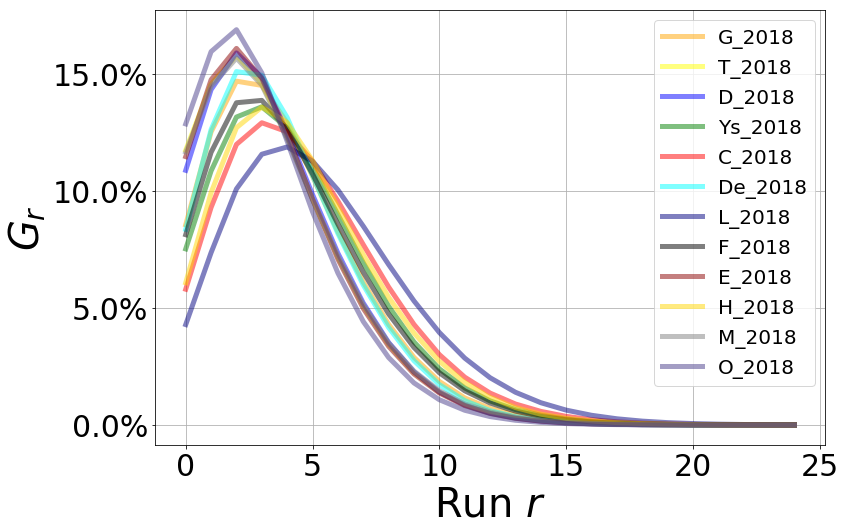

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for data, Run_prob in zip(data_index, Run_probs_runner):
    ax.plot(np.arange(0, R_max), Run_prob, label = data, color=color_key[data.split("_")[0]], linewidth=5, alpha=0.5)
ax.legend(fontsize=20)
ax.tick_params(labelsize=30)
ax.grid()
ax.set_xlabel("Run $r$", fontsize=40)
ax.set_ylabel("$G_r$", fontsize=40)
ax.set_yticklabels(['{:.{}f}%'.format(x*100, 1) for x in ax.get_yticks()])
plt.show()

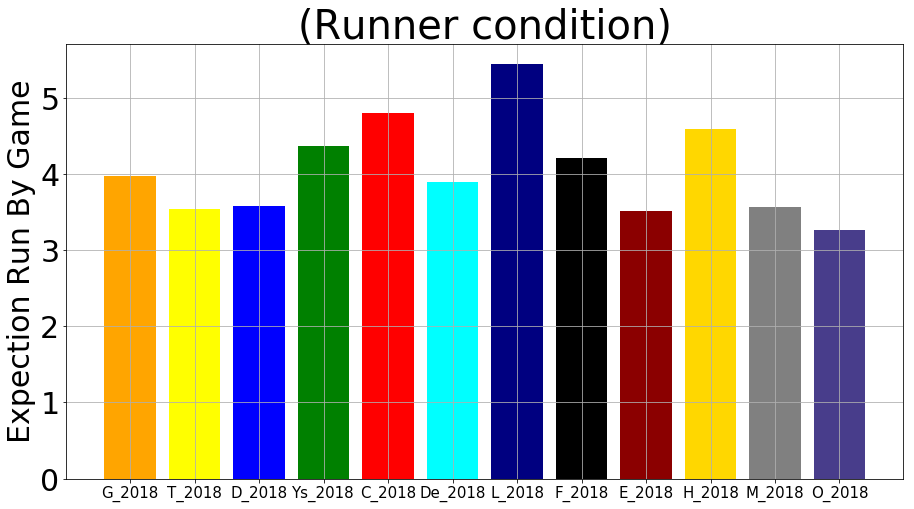

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
for i, ERBG in enumerate(ERBGs_runner):
    ax.bar(i, ERBG, color=color_key[data_index[i].split("_")[0]])
ax.set_xticks(np.arange(12))
ax.set_xticklabels(data_index)
ax.grid()
ax.set_ylabel("Expection Run By Game", fontsize=30)
ax.tick_params(axis="y", labelsize=30)
ax.tick_params(axis="x", labelsize=15)
ax.set_title("(Runner condition)", fontsize=40)
plt.show()

## Reference


---


[1] D. A. D'Esopo and B. Lefkowitz. The Distribution of Runs in the Game of Baseball. SRI Internal Report (1960).

[2] Bukiet, Bruce, Elliotte Rusty Harold, and José Luis Palacios. "A Markov Chain Approach to Baseball." Operations Research 45, no. 1 (1997): 14-23. http://www.jstor.org/stable/171922.

[3] Cover, Thomas M., and Carroll W. Keilers. "An offensive earned-run average for baseball." Operations Research 25.5 (1977): 729-740.

[4] データで楽しむプロ野球, http://baseballdata.jp/index.html

[5] BBANALY プロ野球データ分析さん, https://hihrois-1104o.hatenablog.com/entry/yakyuu-simyu-3

In [27]:
# 確率を計算するチームを決定
folder = "data_csv/batting_number_data/"

# 打順別成績のロード
table = pd.read_csv(folder+"NPB_2018_batting_average.csv", index_col="INDEX")
table.head(10)

,AVE,RBI,HR,H,SIN,DOU,TRI,OBP,SLG,OPS,...,P_SH,SH,SR_SH,SF,PH,H_PH,AVE_PH,DP,EOB,K
INDEX,,,,,,,,,,,,,,,,,,,,,
NO1,0.284,7409,1651,14855,10287,2577,310,0.337,0.37,0.707,...,4,1117,1,380,0,0,.---,1175,821,12470
NO2,0.284,7409,1651,14855,10287,2577,310,0.337,0.37,0.707,...,4,1117,1,380,0,0,.---,1175,821,12470
NO3,0.284,7409,1651,14855,10287,2577,310,0.337,0.37,0.707,...,4,1117,1,380,0,0,.---,1175,821,12470
NO4,0.284,7409,1651,14855,10287,2577,310,0.337,0.37,0.707,...,4,1117,1,380,0,0,.---,1175,821,12470
NO5,0.284,7409,1651,14855,10287,2577,310,0.337,0.37,0.707,...,4,1117,1,380,0,0,.---,1175,821,12470
NO6,0.284,7409,1651,14855,10287,2577,310,0.337,0.37,0.707,...,4,1117,1,380,0,0,.---,1175,821,12470
NO7,0.284,7409,1651,14855,10287,2577,310,0.337,0.37,0.707,...,4,1117,1,380,0,0,.---,1175,821,12470
NO8,0.284,7409,1651,14855,10287,2577,310,0.337,0.37,0.707,...,4,1117,1,380,0,0,.---,1175,821,12470
NO9,0.284,7409,1651,14855,10287,2577,310,0.337,0.37,0.707,...,4,1117,1,380,0,0,.---,1175,821,12470


In [39]:
# 式(30)のR_max
R_max = 25

# 計算を終える状態24の確率
end_prob = 1 - 1e-6

ERBGs = []
Run_probs = []
# 式(3)のP
P = make_prob_matrix_runner_condition(table, runner_condition_table)

# 得点期待値と得点の確率分布
ERBG, Run_prob = cal_ERBG(P, R_max, end_prob)

In [40]:
ERBG

4.106884894932974

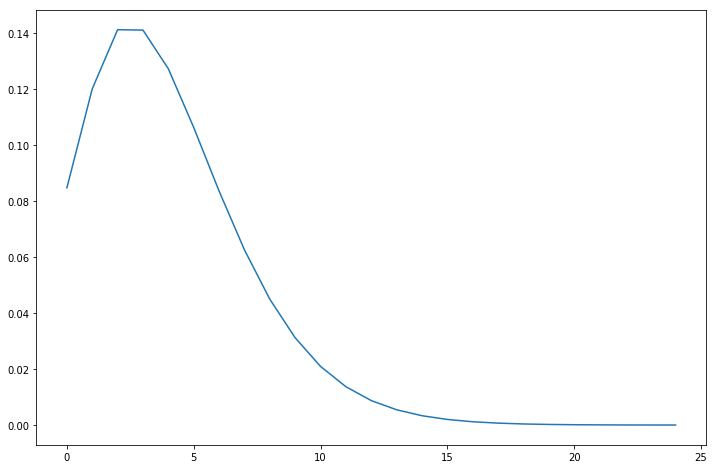

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.plot(Run_prob)
plt.show()